# Recognize hand-written digits with Machine Learning

In this tutorial I'm going to demonstrate how to build up a classifier for hand-written digits using the algorithm of Random Forest, how to validate the model and how to tune the model for better performance.

To run this ipython notebook you'll need to install Anaconda which is an open data science platform powered by Python and can be found from the link below:
https://www.continuum.io/downloads

The MNIST sample data can be dowloaded from Kaggle, the largest data science community in the world, where you can also find numerous of tutorials, starter scripts, instructions and much more.

https://www.kaggle.com/c/digit-recognizer

In [1]:
import pandas as pd # Dataframe
from sklearn.ensemble import RandomForestClassifier # Classification algorithm - random forest
from sklearn import metrics, grid_search
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
import numpy as np
import math
import random as rd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline


# Load Data

In [2]:
mnist = pd.read_csv('train.csv')
print ("Loading finished.")
print ("Data size:", mnist.shape)

Loading finished.
('Data size:', (42000, 785))


# Data Description

* The dataset (train.csv) contains 42,000 rows.
* Each row contains 785 integers.
    * The first integer is called label, standing for the actual number the image is.
    * Pixel0-pixel783 are grayscales of a 28*28 matrix.

In [3]:
mnist.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize the digits

Here we are using matplotlib to plot the digits stored in pixels.

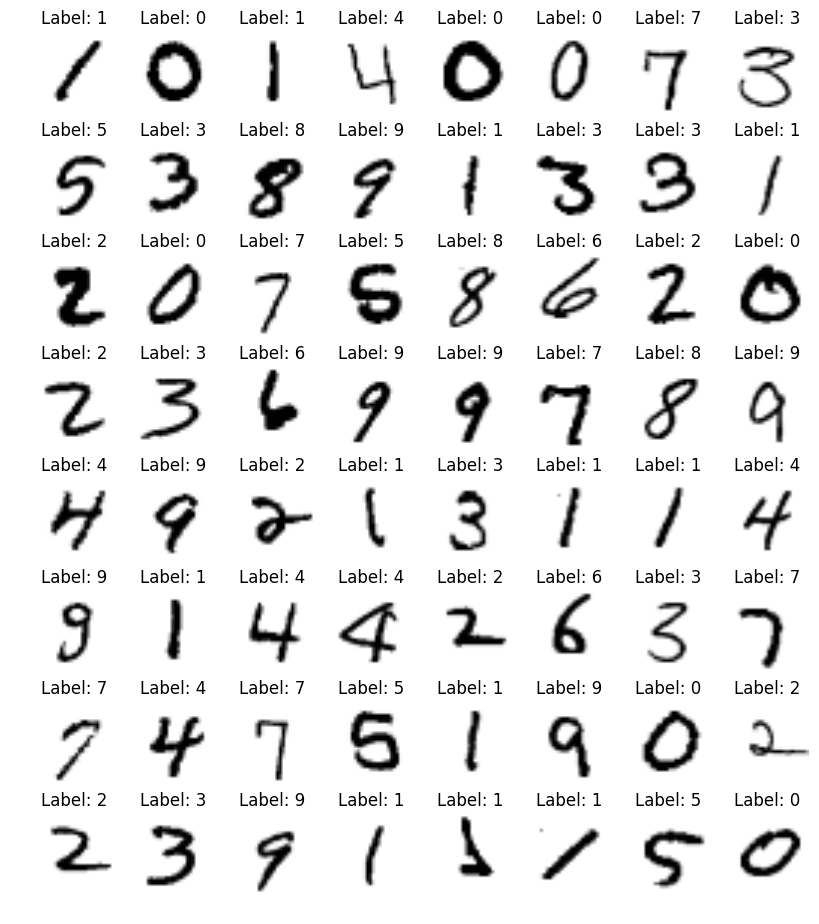

In [4]:
images = [ img.reshape(28, 28) for img in mnist.drop('label',axis=1).values]
images = np.array(images)
labels = mnist.label.values

plt.figure(figsize=(10,10), dpi=600)
for i in range(64):
    plt.subplot(8,8,(i+1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=None)
    plt.title("Label: %d" % (labels[i]))
    plt.axis("off")
    pl.imshow(images[i],cmap=pl.cm.gray_r)
pl.show()

# Let's take a closer look at the 12th digit:

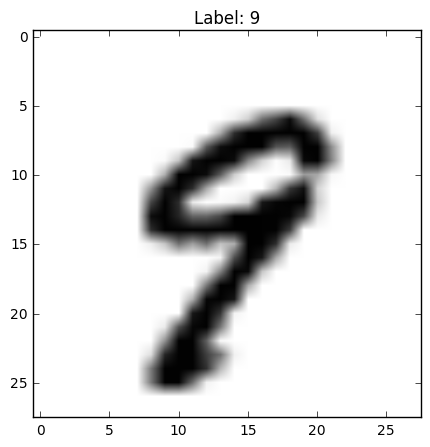

In [5]:
i = 11
plt.figure(figsize=(5,5), dpi=28*28)
plt.title("Label: %d" % (labels[i]))
plt.imshow(images[i],cmap=pl.cm.gray_r)

# Data split
We'll split the data into two parts: training and test.
* Training data will be used to "train" the machine to learn how to recognize the digits - 32,000 records.
* Test data will be used to validate the accuracy of the model - 10,000 records.

In [6]:
train_x = mnist.drop('label',axis=1)[:32000].values
train_y = mnist.label[:32000]
test_x = mnist.drop('label',axis=1)[32000:].values
test_y = mnist.label[32000:]

# Model building

## Train the model

In [7]:
clf = RandomForestClassifier()
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Make predictions

In [8]:
predictions = clf.predict(test_x)

## Validate results

In [9]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(predictions, test_y))
print("Accuracy score: %f" % metrics.accuracy_score(predictions, test_y))

Confusion matrix:
[[ 991    0   12    1    3    7    6    1    3    5]
 [   1 1122    2    6    4    3    2    4   15    6]
 [   3    2  905   39    8    8    3   19   17    7]
 [   2    7    7  952    1   46    0    6   18   18]
 [   0    2    4    0  875    7    5   10    9   24]
 [   2    2    1   19    0  800   10    1   18    7]
 [   3    0    7    4    7   10  961    0   13    3]
 [   1    0   10    7    3    1    1 1003    2   22]
 [   7    2   13   17    7    6    3    2  868   16]
 [   1    2    2    4   24    4    0   12    6  888]]
Accuracy score: 0.936500


## Visualize incorrectly predicted digits

The first digit on top of each image is the actual number and the second one is what's predicted by the model.

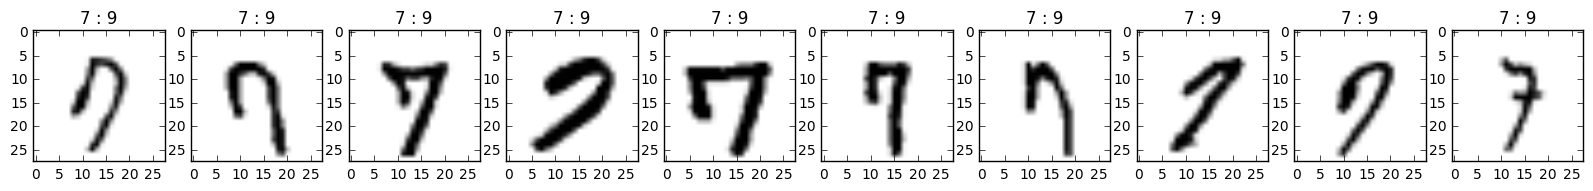

In [10]:
incorrect_images = []
incorrect_labels = []
incorrect_predictions = []
incorrect_data = []

actual_label = 7
pred_label = 9

for (image, label, prediction) in zip(test_x, test_y, predictions):
    if label==actual_label and prediction==pred_label:
        incorrect_data.append(image)
        incorrect_images.append(image.reshape(28,28))
        incorrect_labels.append(label)
        incorrect_predictions.append(prediction)

incorrect_images = np.array(incorrect_images)

plt.figure(figsize=(20,10), dpi=600)
for i in range(min([len(incorrect_images),10])):
    plt.subplot(1,min([len(incorrect_images),10]),(i+1))
    plt.title("%d : %d" % (incorrect_labels[i], incorrect_predictions[i]))
    pl.imshow(incorrect_images[i],cmap=pl.cm.gray_r)
pl.show()

# Tune the model
One algorithm may have many parameters and untuned parameters may impact the results significantly. Paramter tuning is one of the biggest challenges in practical machine learning. There are typically two approaches for tuning:
* Automated tuning. For instance, grid search and bayersian optimazition
    * Requires less relatively less knowlege and experience.
    * Time consuming.
* Manual tuning
    * More knowlege and experience required.
    * Time efficient.
    
    
Here we'll use grid search for automated parameters tuning. What grid search does is to firstly create a space of parameter combinations then train/validate the model for each combinations and finally pick up the best-performed one.

There are three parameters we will be tuning for Random Forest:

* n_estimators - The number of trees in the "forest". Generally the larger it is, the better the performance will be.
* criterion - The function to measure the quality of a branch split of decision trees.
* max_depth - The maximum depth of the tree. Larger number indicates more complexities and greater chance of overfitting.

In [11]:
def search_model(train_x, train_y, est, param_grid, n_jobs, cv):
    model = grid_search.GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
#                                      scoring    = 'roc_auc',
                                     verbose    = 10,
                                     n_jobs  = n_jobs,
                                     iid        = True,
                                     refit    = True,
                                     cv      = cv)
    # Fit Grid Search Model
    model.fit(train_x, train_y)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    return model

param_grid = {'n_estimators': [10,50,100]
                , 'criterion': ['gini','entropy']
                , 'max_depth': [10,20,30]
              }
model = search_model(train_x
                                         , train_y
                                         , RandomForestClassifier()
                                         , param_grid
                                         , n_jobs=1
                                         , cv=3)   



Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] n_estimators=10, criterion=gini, max_depth=10 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=10, score=0.918471 -   1.4s
[CV] n_estimators=10, criterion=gini, max_depth=10 ...................


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    1.4s


[CV]  n_estimators=10, criterion=gini, max_depth=10, score=0.916096 -   1.3s
[CV] n_estimators=10, criterion=gini, max_depth=10 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=10, score=0.913900 -   1.4s
[CV] n_estimators=50, criterion=gini, max_depth=10 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=10, score=0.939368 -   4.8s
[CV] n_estimators=50, criterion=gini, max_depth=10 ...................


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    9.0s


[CV]  n_estimators=50, criterion=gini, max_depth=10, score=0.938127 -   4.9s
[CV] n_estimators=50, criterion=gini, max_depth=10 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=10, score=0.941381 -   5.0s
[CV] n_estimators=100, criterion=gini, max_depth=10 ..................
[CV]  n_estimators=100, criterion=gini, max_depth=10, score=0.940868 -   9.0s
[CV] n_estimators=100, criterion=gini, max_depth=10 ..................


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:   28.0s


[CV]  n_estimators=100, criterion=gini, max_depth=10, score=0.939252 -   9.1s
[CV] n_estimators=100, criterion=gini, max_depth=10 ..................
[CV]  n_estimators=100, criterion=gini, max_depth=10, score=0.941474 -   9.0s
[CV] n_estimators=10, criterion=gini, max_depth=20 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=20, score=0.929154 -   1.6s
[CV] n_estimators=10, criterion=gini, max_depth=20 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=20, score=0.927627 -   1.6s
[CV] n_estimators=10, criterion=gini, max_depth=20 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=20, score=0.927593 -   1.6s
[CV] n_estimators=50, criterion=gini, max_depth=20 ...................


[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:   51.2s


[CV]  n_estimators=50, criterion=gini, max_depth=20, score=0.954269 -   6.0s
[CV] n_estimators=50, criterion=gini, max_depth=20 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=20, score=0.955001 -   6.1s
[CV] n_estimators=50, criterion=gini, max_depth=20 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=20, score=0.956200 -   6.0s
[CV] n_estimators=100, criterion=gini, max_depth=20 ..................
[CV]  n_estimators=100, criterion=gini, max_depth=20, score=0.958579 -  11.6s
[CV] n_estimators=100, criterion=gini, max_depth=20 ..................
[CV]  n_estimators=100, criterion=gini, max_depth=20, score=0.958470 -  11.7s
[CV] n_estimators=100, criterion=gini, max_depth=20 ..................


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  1.5min


[CV]  n_estimators=100, criterion=gini, max_depth=20, score=0.957513 -  11.7s
[CV] n_estimators=10, criterion=gini, max_depth=30 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=30, score=0.930091 -   1.6s
[CV] n_estimators=10, criterion=gini, max_depth=30 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=30, score=0.925190 -   1.6s
[CV] n_estimators=10, criterion=gini, max_depth=30 ...................
[CV]  n_estimators=10, criterion=gini, max_depth=30, score=0.925624 -   1.5s
[CV] n_estimators=50, criterion=gini, max_depth=30 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=30, score=0.954925 -   6.3s
[CV] n_estimators=50, criterion=gini, max_depth=30 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=30, score=0.956595 -   6.3s
[CV] n_estimators=50, criterion=gini, max_depth=30 ...................
[CV]  n_estimators=50, criterion=gini, max_depth=30, score=0.953573 -   6.2s
[CV] n_estimators=100, criterion=g

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:  2.1min


[CV]  n_estimators=100, criterion=gini, max_depth=30, score=0.958860 -  11.7s
[CV] n_estimators=100, criterion=gini, max_depth=30 ..................
[CV]  n_estimators=100, criterion=gini, max_depth=30, score=0.958751 -  12.4s
[CV] n_estimators=100, criterion=gini, max_depth=30 ..................
[CV]  n_estimators=100, criterion=gini, max_depth=30, score=0.958169 -  12.4s
[CV] n_estimators=10, criterion=entropy, max_depth=10 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=10, score=0.922875 -   1.9s
[CV] n_estimators=10, criterion=entropy, max_depth=10 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=10, score=0.917503 -   1.9s
[CV] n_estimators=10, criterion=entropy, max_depth=10 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=10, score=0.920934 -   1.8s
[CV] n_estimators=50, criterion=entropy, max_depth=10 ................
[CV]  n_estimators=50, criterion=entropy, max_depth=10, score=0.941243 -   7.3s
[CV] n_estimators=50

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:  3.0min


[CV]  n_estimators=50, criterion=entropy, max_depth=10, score=0.940189 -   7.3s
[CV] n_estimators=50, criterion=entropy, max_depth=10 ................
[CV]  n_estimators=50, criterion=entropy, max_depth=10, score=0.942412 -   7.1s
[CV] n_estimators=100, criterion=entropy, max_depth=10 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=10, score=0.944991 -  14.2s
[CV] n_estimators=100, criterion=entropy, max_depth=10 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=10, score=0.943283 -  13.8s
[CV] n_estimators=100, criterion=entropy, max_depth=10 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=10, score=0.943163 -  13.6s
[CV] n_estimators=10, criterion=entropy, max_depth=20 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=20, score=0.934776 -   2.0s
[CV] n_estimators=10, criterion=entropy, max_depth=20 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=20, score=0.933158 -   2.0s
[CV] n_esti

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:  4.1min


[CV]  n_estimators=50, criterion=entropy, max_depth=20, score=0.954814 -   8.7s
[CV] n_estimators=50, criterion=entropy, max_depth=20 ................
[CV]  n_estimators=50, criterion=entropy, max_depth=20, score=0.952542 -   8.2s
[CV] n_estimators=100, criterion=entropy, max_depth=20 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=20, score=0.958017 -  15.8s
[CV] n_estimators=100, criterion=entropy, max_depth=20 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=20, score=0.958189 -  15.8s
[CV] n_estimators=100, criterion=entropy, max_depth=20 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=20, score=0.955637 -  15.7s
[CV] n_estimators=10, criterion=entropy, max_depth=30 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=30, score=0.932715 -   2.1s
[CV] n_estimators=10, criterion=entropy, max_depth=30 ................
[CV]  n_estimators=10, criterion=entropy, max_depth=30, score=0.926034 -   2.0s
[CV] n_esti

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  5.5min


[CV]  n_estimators=50, criterion=entropy, max_depth=30, score=0.955095 -   8.2s
[CV] n_estimators=50, criterion=entropy, max_depth=30 ................
[CV]  n_estimators=50, criterion=entropy, max_depth=30, score=0.954793 -   8.4s
[CV] n_estimators=100, criterion=entropy, max_depth=30 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=30, score=0.958486 -  16.4s
[CV] n_estimators=100, criterion=entropy, max_depth=30 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=30, score=0.956033 -  16.3s
[CV] n_estimators=100, criterion=entropy, max_depth=30 ...............
[CV]  n_estimators=100, criterion=entropy, max_depth=30, score=0.957888 -  16.6s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  6.6min finished


Best score: 0.959
('Best parameters set:', {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 30})


# Validate the tuned model

In [12]:
tuned_predictions = model.predict(test_x)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(tuned_predictions, test_y))
print("Accuracy score of tuned model: %f" % metrics.accuracy_score(tuned_predictions, test_y))
print("Accuracy score of default model: %f" % metrics.accuracy_score(tuned_predictions, test_y))

Confusion matrix:
[[ 993    0    3    2    1    5    5    0    1    5]
 [   0 1127    0    1    3    0    2    3    9    4]
 [   1    2  929   20    0    1    0   11    4    6]
 [   0    3    5  989    0   17    0    0    5   14]
 [   0    1    2    1  900    3    3    3    4   11]
 [   1    1    4    9    0  850    2    1    9    4]
 [   7    1    4    2    5    6  979    0    6    0]
 [   0    0    5    8    0    0    0 1031    0   14]
 [   9    3   10   11    4    7    0    3  924    7]
 [   0    1    1    6   19    3    0    6    7  931]]
Accuracy score of tuned model: 0.965300
Accuracy score of default model: 0.965300


## What's improved?

We'll make predictions for those digits that were incorrectly predicted by the untuned model, with the tuned model, then plot them to see what's improved and what's not.

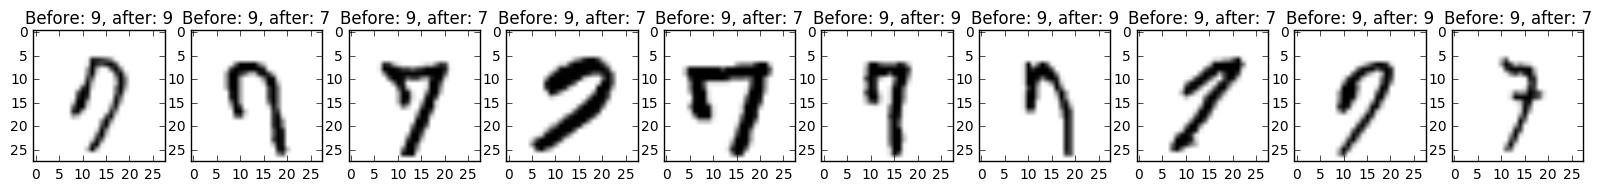

In [13]:
tuned_val_predictions = model.predict(incorrect_data)
plt.figure(figsize=(20,10), dpi=600)
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.title("Before: %d, after: %d" % (incorrect_predictions[i],tuned_val_predictions[i]))
    pl.imshow(incorrect_images[i],cmap=pl.cm.gray_r)
pl.show()